Modules nécessaires : 

In [4]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

from HiggsML.ingestion import Ingestion
from HiggsML.datasets import download_dataset
from sample_code_submission.neural_network import NeuralNetwork
from sys import path
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from itertools import product
from numpy.random import RandomState
import warnings
import os
import sys

warnings.filterwarnings("ignore")

Charger les données : 

In [5]:
data = download_dataset(
    "blackSwan_data"
)  # change to "blackSwan_data" for the actual data

# load train set
data.load_train_set()
data_set = data.get_train_set()

2025-06-05 21:55:49,932 - HiggsML.datasets     - INFO     - Handling as dataset name: blackSwan_data
2025-06-05 21:55:49,932 - HiggsML.datasets     - INFO     - Current working directory: c:\Users\marwa\Desktop\Neural Network\Higgs_collaboration_A
2025-06-05 21:55:49,957 - HiggsML.datasets     - INFO     - Total rows: 2000000
2025-06-05 21:55:49,957 - HiggsML.datasets     - INFO     - Test size: 600000
2025-06-05 21:55:50,071 - HiggsML.datasets     - INFO     - Selected train size: 1400000
2025-06-05 21:55:51,270 - HiggsML.datasets     - INFO     - Data loaded successfully


In [6]:
target = data_set["labels"]
weights = data_set["weights"]
detailed_label = data_set["detailed_labels"]
keys = np.unique(detailed_label)

Direction

In [7]:
root_dir = os.getcwd()
print("Root directory is", root_dir)
submission_dir = os.path.join(root_dir, "sample_code_submission")

# The directory where results and other outputs from the participant's code will be written
output_dir = os.path.join(root_dir, "sample_result_submission")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

Root directory is c:\Users\marwa\Desktop\Neural Network\Higgs_collaboration_A


Import Submission Model

In [8]:
path.append(submission_dir)
from model import Model

Testing Settings

In [9]:
TEST_SETTINGS = {
    "systematics": {  # Systematics to use
        "tes": False,  # tau energy scale
        "jes": False,  # jet energy scale
        "soft_met": False,  # soft term in MET
        "ttbar_scale": False,  # W boson scale factor
        "diboson_scale": False,  # Diboson scale factor
        "bkg_scale": False,  # Background scale factor
    },
    "num_pseudo_experiments": 25,  # Number of pseudo-experiments to run per set
    "num_of_sets": 25,  # Number of sets of pseudo-experiments to run
}

RANDOM_SEED = 42


In [10]:
test_settings = TEST_SETTINGS.copy()

random_state = np.random.RandomState(RANDOM_SEED)
test_settings["ground_truth_mus"] = (
    random_state.uniform(0.1, 3, test_settings["num_of_sets"])
).tolist()

random_settings_file = os.path.join(output_dir, "test_settings.json")
with open(random_settings_file, "w") as f:
    json.dump(test_settings, f)

Boucle sur "Ingestion" en faisant varier epochs

Graphique

In [11]:
def graphique(E, S, xlabel, ylabel, title_):
    plt.plot(E, S, marker='o', linestyle='-', color='b')
    plt.title(title_)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

Significance

In [12]:

def optimization(train_data): 
    L_epochs = np.linspace(0, 300, 7)
    sigmax = 0
    epochs_max = 1
    auc_max = 0
    S = []
    E = []
    A = []
    for k in range(len(L_epochs)):
        ingestion = Ingestion(data)
        # initialize submission
        ingestion.init_submission(Model, "NN")
        ingestion.model.model.epochs = int(L_epochs[k])
        print(ingestion.model.model.epochs)
        ingestion.fit_submission()
        sig1 = ingestion.model.sig
        print(sig1)
        #visualisation des données :
        S.append(sig1)
        E.append(int(L_epochs[k]))
        A.append(ingestion.model.auc)
        if sig1>sigmax: 
            sigmax = sig1
            auc_max = ingestion.model.auc
            epochs_max = int(L_epochs[k])
    graphique(E, S, 'epochs', 'significance', 'Significance en fonction de epochs')
    graphique(E, A, 'epochs', 'AUC', 'Significance en fonction de AUC')
    
    return sigmax, epochs_max



Il y a plusieurs problématique : 
Comment modifier une variable epochs de notre 

test_labels=ingestion.model.training_set["labels"],test_weights=ingestion.model.training_set["weights"]

Lancement de la boucle

A l'aide des autres programmes d'optimisations, on a obtenu batchsize : 120, 

Paramètres par défauts : 
300 000 données initiales
batchsize = 16
number_of_layers = 10
width = 300
activation = 'relu'

2025-06-05 21:55:53,063 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 21:55:53,077 - HiggsML.datasets     - INFO     - Selected train size: 100000
2025-06-05 21:55:53,485 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 21:55:53,520 - HiggsML.datasets     - INFO     - Selected train size: 100000


sum_signal_weights:  671.0314455880059
sum_bkg_weights:  105047.96855441199


2025-06-05 21:55:53,904 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 21:55:53,938 - HiggsML.datasets     - INFO     - Selected train size: 100000



Valid Data:  (100000, 28)
Valid Labels:  (100000,)
Valid Weights:  (100000,)
sum_signal_weights:  675.6744848284516
sum_bkg_weights:  105043.32551517156


2025-06-05 21:55:54,315 - HiggsML.datasets     - INFO     - Data loaded successfully



sum_signal_weights:  669.3057815035174
sum_bkg_weights:  105049.69421849652
 
 
Training Data:  (100000, 28)
DEBUG: model_type = 'NN'


2025-06-05 21:55:54,548 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model


 Model is NN
0
2867/2867 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
score shape before threshold (91738,)
score shape after threshold (91738,)
2867/2867 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
2867/2867 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
saved_info {'beta': np.float64(2158.803727332551), 'gamma': np.float64(19.63737631642235), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x000001FE8A11F420>, 'jes_fit': <function jes_fitter.<locals>.fit_function at 0x000001FE8A11F920>}
2863/2863 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
2867/2867 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
Holdout Significance:  2.069849584329925
2870/2870 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
Train Results: 
	 mu_hat  :  3.3375760234541323
	 del_mu_stat  :  2.3767825414355443
	 del_mu_sys  :  0.0
	 del_mu_tot  :  2.3767825414355443
Holdout Results: 
	 mu_hat  :  1.0000000000000042
	 del_mu_stat  :  2.3767825414355443
	 del_mu_sys  :  0.0
	 del_mu_tot  :  2.3767825414355443
Valid Results: 
	 mu_hat  :  1.2257940085385906
	 del_mu_stat  :  2.3767825414

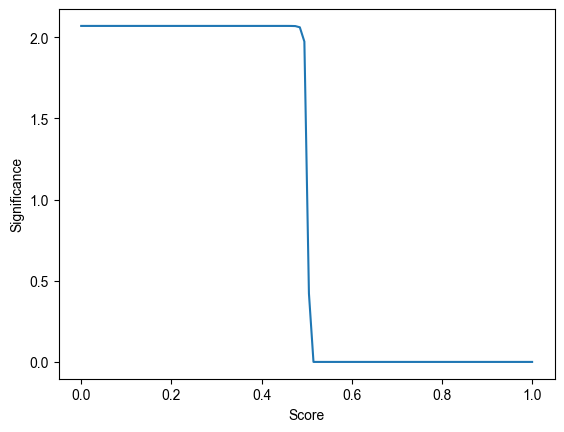

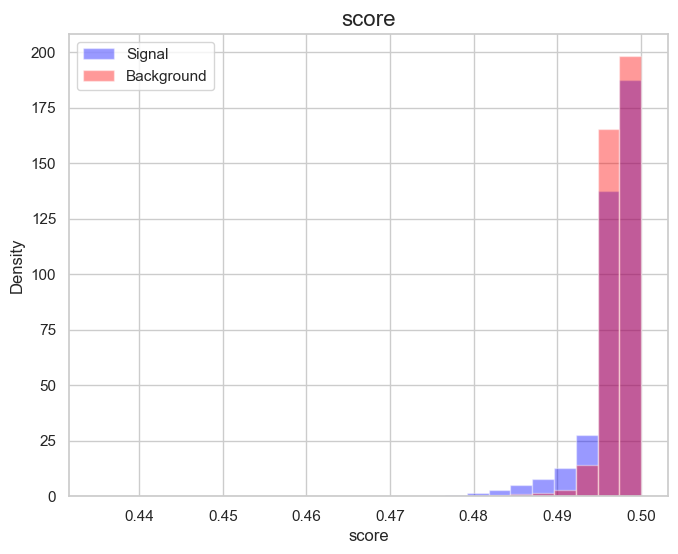

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


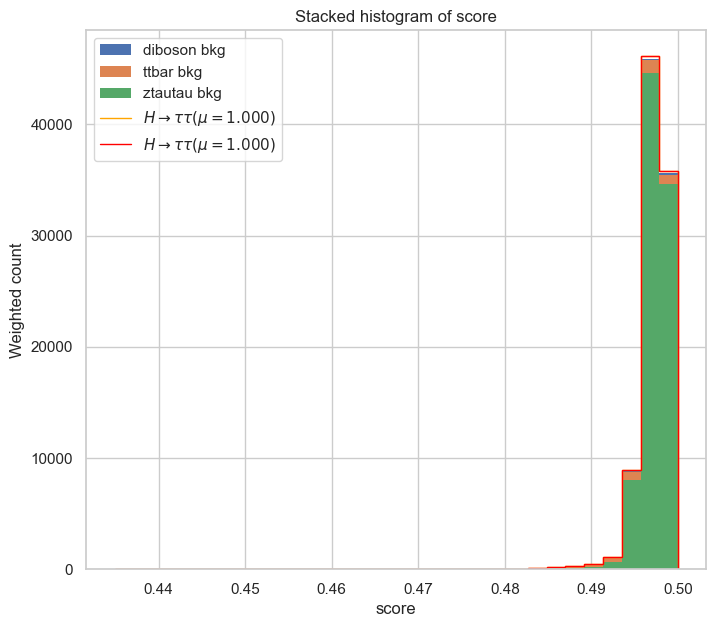

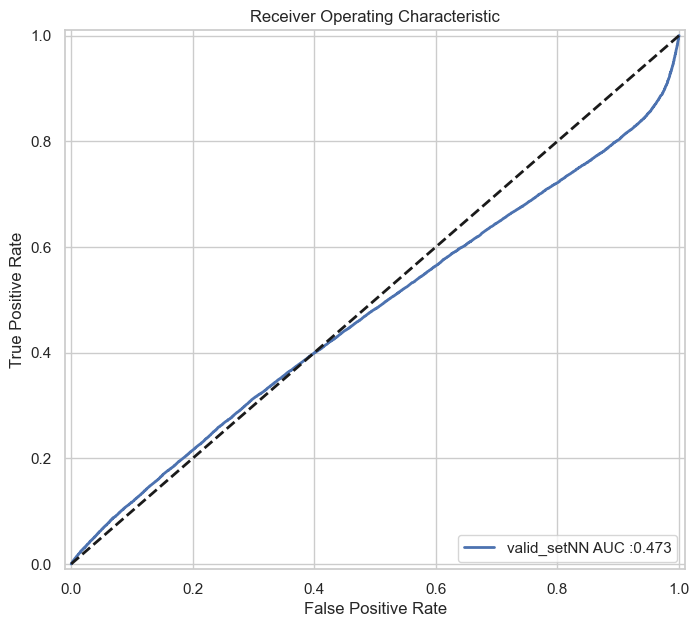

2025-06-05 21:56:44,241 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 21:56:44,256 - HiggsML.datasets     - INFO     - Selected train size: 100000


2.069849584329925


2025-06-05 21:56:44,698 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 21:56:44,733 - HiggsML.datasets     - INFO     - Selected train size: 100000


sum_signal_weights:  673.9537294682552
sum_bkg_weights:  105045.04627053178


2025-06-05 21:56:45,158 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 21:56:45,190 - HiggsML.datasets     - INFO     - Selected train size: 100000



Valid Data:  (100000, 28)
Valid Labels:  (100000,)
Valid Weights:  (100000,)
sum_signal_weights:  669.8414923475656
sum_bkg_weights:  105049.15850765244


2025-06-05 21:56:45,641 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 21:56:45,803 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



sum_signal_weights:  672.2100915980444
sum_bkg_weights:  105046.78990840196
 
 
Training Data:  (100000, 28)
DEBUG: model_type = 'NN'
 Model is NN
50
Epoch 1/50
782/782 - 13s - 16ms/step - accuracy: 0.8018 - loss: 0.9969
Epoch 2/50
782/782 - 9s - 11ms/step - accuracy: 0.8153 - loss: 0.9491
Epoch 3/50
782/782 - 9s - 11ms/step - accuracy: 0.8169 - loss: 0.9394
Epoch 4/50
782/782 - 9s - 11ms/step - accuracy: 0.8174 - loss: 0.9300
Epoch 5/50
782/782 - 9s - 11ms/step - accuracy: 0.8188 - loss: 0.9247
Epoch 6/50
782/782 - 9s - 11ms/step - accuracy: 0.8204 - loss: 0.9200
Epoch 7/50
782/782 - 9s - 11ms/step - accuracy: 0.8217 - loss: 0.9157
Epoch 8/50
782/782 - 9s - 11ms/step - accuracy: 0.8233 - loss: 0.9116
Epoch 9/50
782/782 - 9s - 11ms/step - accuracy: 0.8230 - loss: 0.9085
Epoch 10/50
782/782 - 8s - 11ms/step - accuracy: 0.8243 - loss: 0.9044
Epoch 11/50
782/782 - 9s - 11ms/step - accuracy: 0.8253 - loss: 0.9002
Epoch 12/50
782/782 - 9s - 11ms/step - accuracy: 0.8256 - loss: 0.8954
Epoch

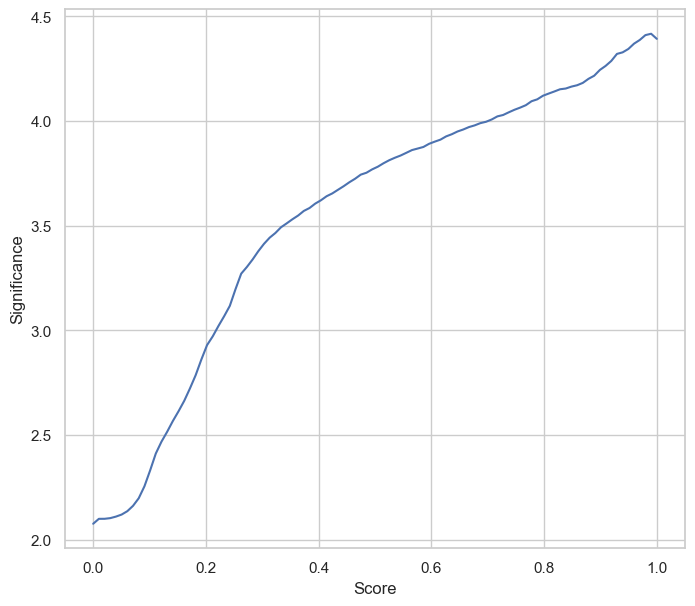

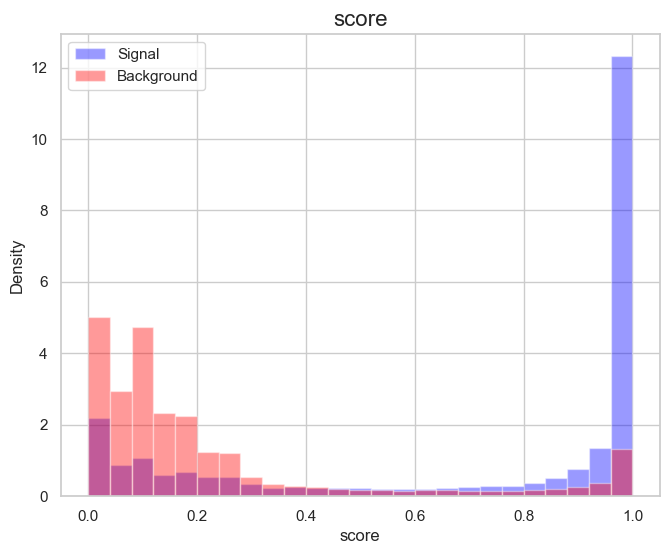

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


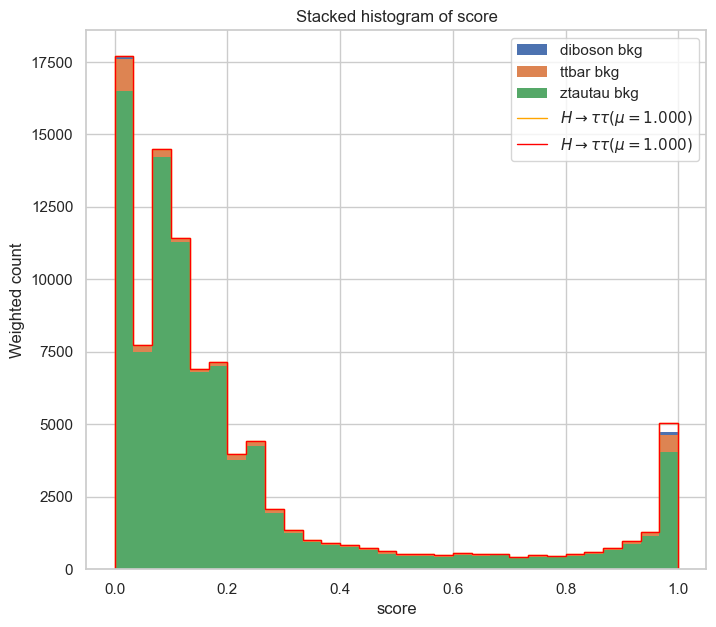

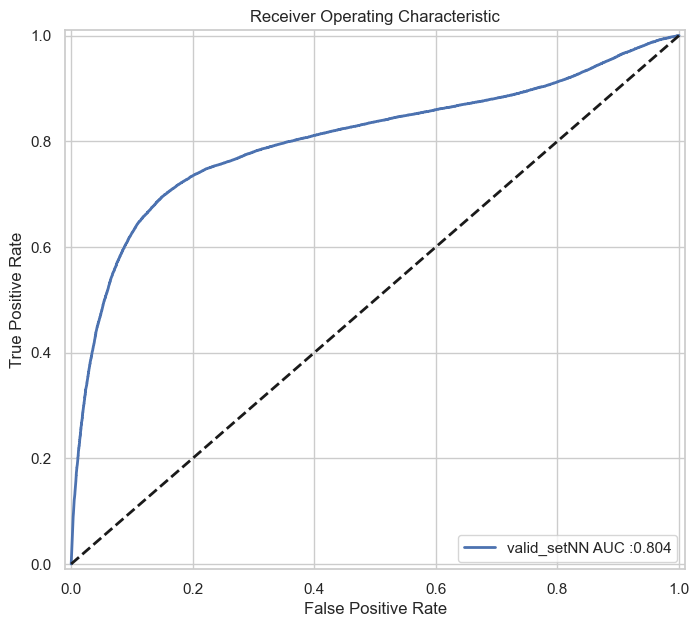

2025-06-05 22:05:06,082 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 22:05:06,096 - HiggsML.datasets     - INFO     - Selected train size: 100000


4.417542020989852


2025-06-05 22:05:06,545 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 22:05:06,593 - HiggsML.datasets     - INFO     - Selected train size: 100000


sum_signal_weights:  674.3120762299004
sum_bkg_weights:  105044.68792377008


2025-06-05 22:05:07,056 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 22:05:07,102 - HiggsML.datasets     - INFO     - Selected train size: 100000



Valid Data:  (100000, 28)
Valid Labels:  (100000,)
Valid Weights:  (100000,)
sum_signal_weights:  674.2119726531805
sum_bkg_weights:  105044.7880273468


2025-06-05 22:05:07,557 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 22:05:07,737 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



sum_signal_weights:  667.4920199270226
sum_bkg_weights:  105051.50798007294
 
 
Training Data:  (100000, 28)
DEBUG: model_type = 'NN'
 Model is NN
100
Epoch 1/100
782/782 - 13s - 17ms/step - accuracy: 0.8011 - loss: 0.9863
Epoch 2/100
782/782 - 9s - 12ms/step - accuracy: 0.8130 - loss: 0.9468
Epoch 3/100
782/782 - 9s - 12ms/step - accuracy: 0.8138 - loss: 0.9342
Epoch 4/100
782/782 - 9s - 12ms/step - accuracy: 0.8154 - loss: 0.9273
Epoch 5/100
782/782 - 9s - 12ms/step - accuracy: 0.8175 - loss: 0.9246
Epoch 6/100
782/782 - 9s - 12ms/step - accuracy: 0.8210 - loss: 0.9168
Epoch 7/100
782/782 - 9s - 12ms/step - accuracy: 0.8203 - loss: 0.9140
Epoch 8/100
782/782 - 9s - 12ms/step - accuracy: 0.8213 - loss: 0.9099
Epoch 9/100
782/782 - 9s - 12ms/step - accuracy: 0.8218 - loss: 0.9050
Epoch 10/100
782/782 - 9s - 12ms/step - accuracy: 0.8201 - loss: 0.9022
Epoch 11/100
782/782 - 9s - 12ms/step - accuracy: 0.8218 - loss: 0.8984
Epoch 12/100
782/782 - 9s - 12ms/step - accuracy: 0.8236 - loss:

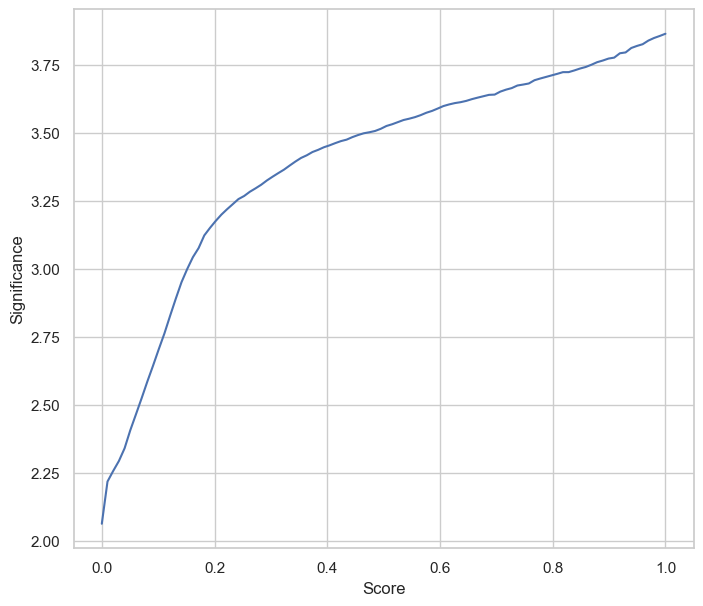

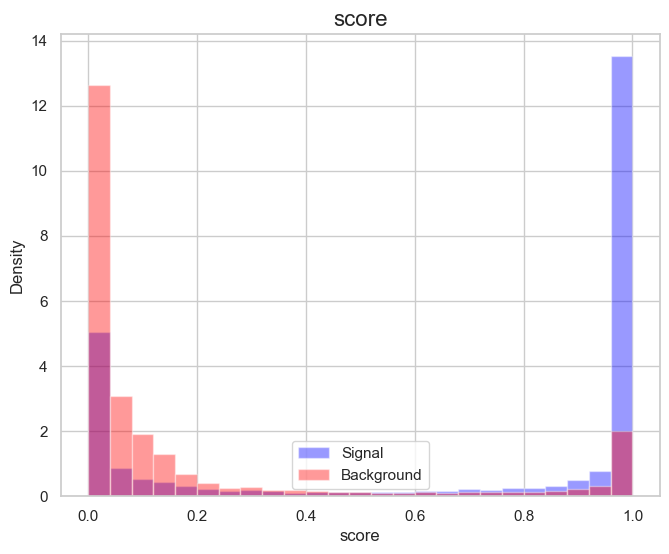

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


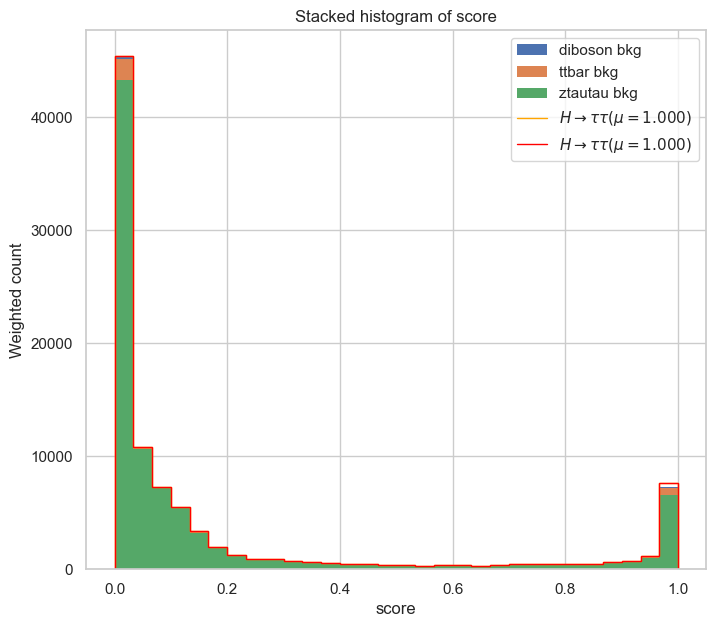

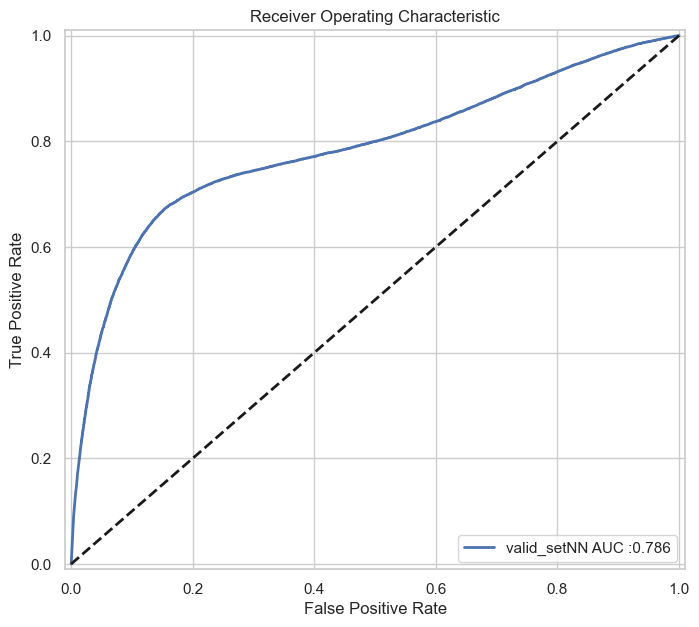

2025-06-05 22:21:24,877 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 22:21:24,889 - HiggsML.datasets     - INFO     - Selected train size: 100000


3.8641803013158356


2025-06-05 22:21:25,371 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 22:21:25,409 - HiggsML.datasets     - INFO     - Selected train size: 100000


sum_signal_weights:  674.6401701454395
sum_bkg_weights:  105044.35982985454


2025-06-05 22:21:25,820 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 22:21:25,859 - HiggsML.datasets     - INFO     - Selected train size: 100000



Valid Data:  (100000, 28)
Valid Labels:  (100000,)
Valid Weights:  (100000,)
sum_signal_weights:  670.2573347078745
sum_bkg_weights:  105048.74266529213


2025-06-05 22:21:26,275 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 22:21:26,449 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



sum_signal_weights:  671.10888144093
sum_bkg_weights:  105047.89111855903
 
 
Training Data:  (100000, 28)
DEBUG: model_type = 'NN'
 Model is NN
150
Epoch 1/150
782/782 - 12s - 16ms/step - accuracy: 0.8053 - loss: 0.9865
Epoch 2/150
782/782 - 9s - 11ms/step - accuracy: 0.8163 - loss: 0.9419
Epoch 3/150
782/782 - 9s - 11ms/step - accuracy: 0.8193 - loss: 0.9318
Epoch 4/150
782/782 - 9s - 11ms/step - accuracy: 0.8207 - loss: 0.9212
Epoch 5/150
782/782 - 9s - 11ms/step - accuracy: 0.8219 - loss: 0.9191
Epoch 6/150
782/782 - 9s - 11ms/step - accuracy: 0.8231 - loss: 0.9150
Epoch 7/150
782/782 - 9s - 11ms/step - accuracy: 0.8231 - loss: 0.9090
Epoch 8/150
782/782 - 9s - 11ms/step - accuracy: 0.8252 - loss: 0.9039
Epoch 9/150
782/782 - 9s - 11ms/step - accuracy: 0.8257 - loss: 0.9003
Epoch 10/150
782/782 - 9s - 11ms/step - accuracy: 0.8283 - loss: 0.8943
Epoch 11/150
782/782 - 9s - 11ms/step - accuracy: 0.8260 - loss: 0.8923
Epoch 12/150
782/782 - 9s - 12ms/step - accuracy: 0.8283 - loss: 0

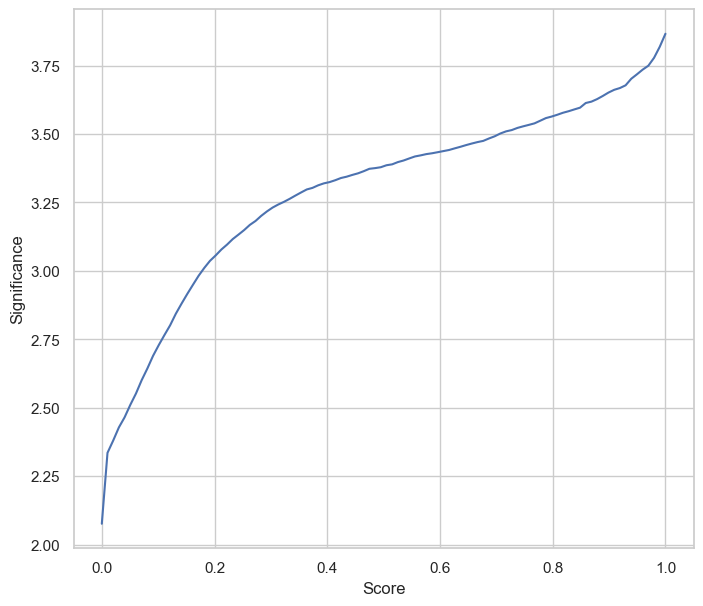

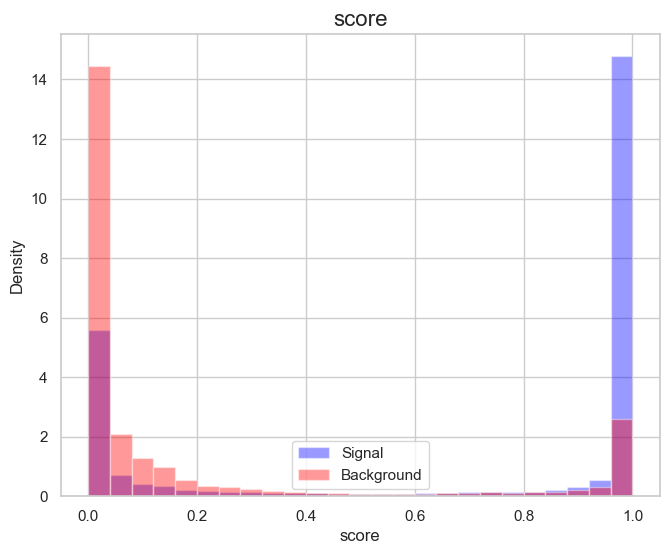

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


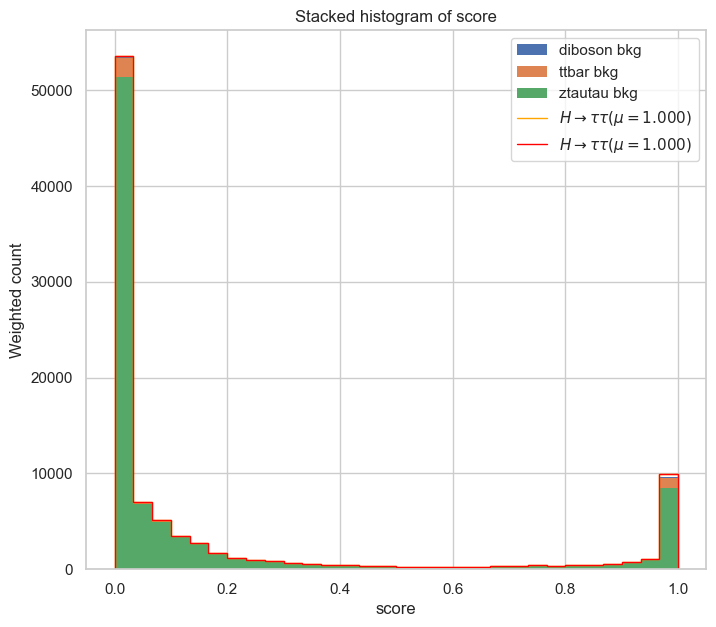

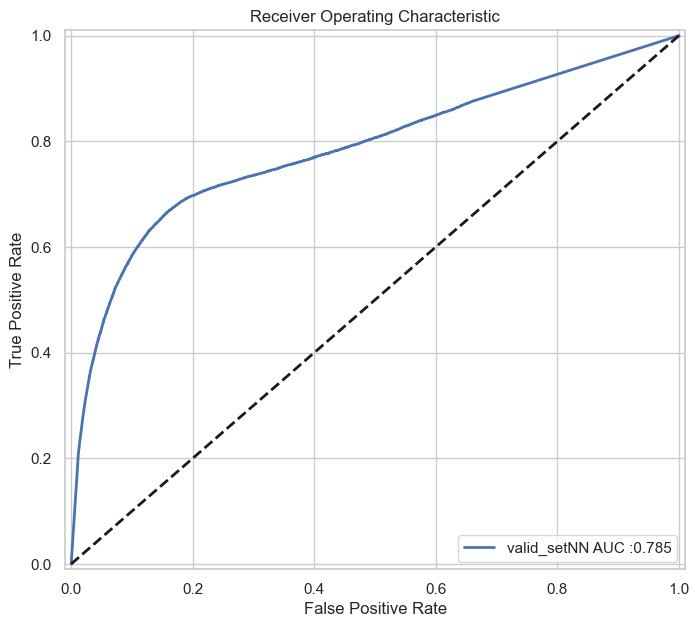

2025-06-05 22:44:46,847 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 22:44:46,858 - HiggsML.datasets     - INFO     - Selected train size: 100000


3.8660700341876537


2025-06-05 22:44:47,345 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 22:44:47,377 - HiggsML.datasets     - INFO     - Selected train size: 100000


sum_signal_weights:  675.9387223913988
sum_bkg_weights:  105043.06127760859


2025-06-05 22:44:47,802 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 22:44:47,842 - HiggsML.datasets     - INFO     - Selected train size: 100000



Valid Data:  (100000, 28)
Valid Labels:  (100000,)
Valid Weights:  (100000,)
sum_signal_weights:  669.4643391246917
sum_bkg_weights:  105049.53566087529


2025-06-05 22:44:48,248 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 22:44:48,442 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



sum_signal_weights:  670.6096633268833
sum_bkg_weights:  105048.39033667312
 
 
Training Data:  (100000, 28)
DEBUG: model_type = 'NN'
 Model is NN
200
Epoch 1/200
782/782 - 13s - 17ms/step - accuracy: 0.8061 - loss: 0.9902
Epoch 2/200
782/782 - 9s - 11ms/step - accuracy: 0.8180 - loss: 0.9436
Epoch 3/200
782/782 - 9s - 11ms/step - accuracy: 0.8177 - loss: 0.9352
Epoch 4/200
782/782 - 9s - 11ms/step - accuracy: 0.8205 - loss: 0.9257
Epoch 5/200
782/782 - 9s - 12ms/step - accuracy: 0.8210 - loss: 0.9211
Epoch 6/200
782/782 - 10s - 13ms/step - accuracy: 0.8221 - loss: 0.9134
Epoch 7/200
782/782 - 9s - 12ms/step - accuracy: 0.8230 - loss: 0.9100
Epoch 8/200
782/782 - 9s - 12ms/step - accuracy: 0.8256 - loss: 0.9077
Epoch 9/200
782/782 - 9s - 12ms/step - accuracy: 0.8261 - loss: 0.9009
Epoch 10/200
782/782 - 9s - 12ms/step - accuracy: 0.8272 - loss: 0.8977
Epoch 11/200
782/782 - 9s - 12ms/step - accuracy: 0.8251 - loss: 0.8936
Epoch 12/200
782/782 - 9s - 12ms/step - accuracy: 0.8280 - loss

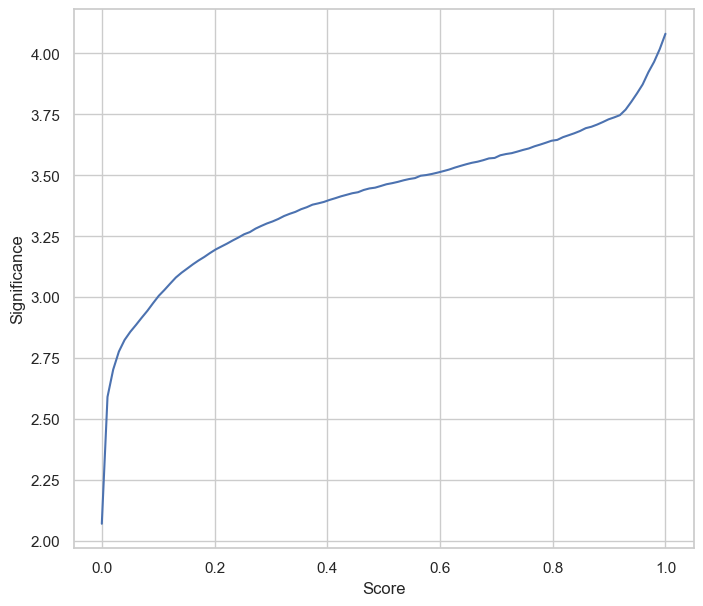

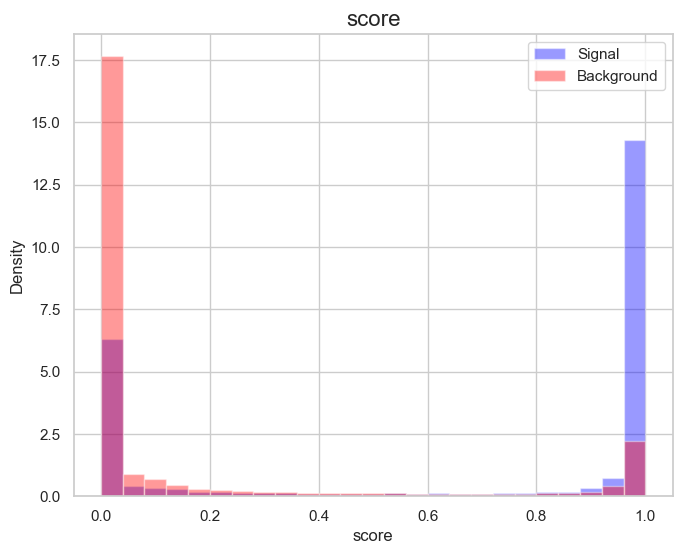

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


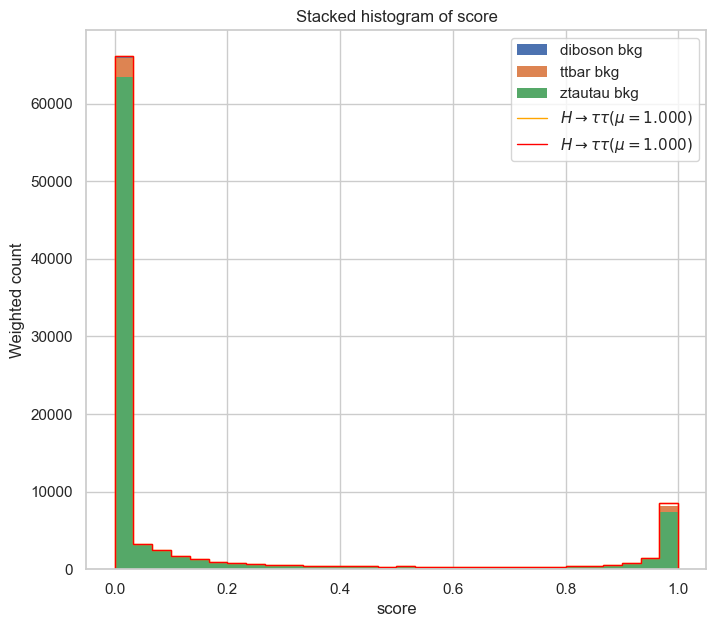

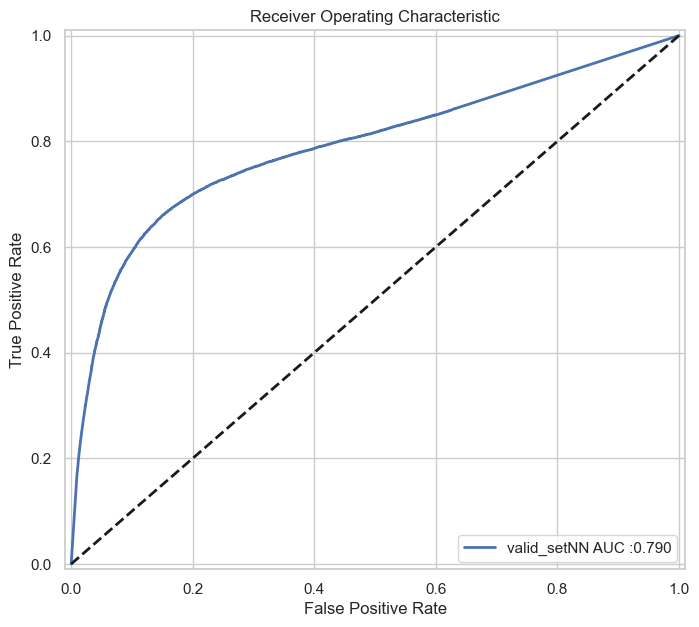

2025-06-05 23:15:47,502 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 23:15:47,518 - HiggsML.datasets     - INFO     - Selected train size: 100000


4.080868003170242


2025-06-05 23:15:47,972 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 23:15:48,008 - HiggsML.datasets     - INFO     - Selected train size: 100000


sum_signal_weights:  670.7263640077057
sum_bkg_weights:  105048.27363599233


2025-06-05 23:15:48,488 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 23:15:48,542 - HiggsML.datasets     - INFO     - Selected train size: 100000



Valid Data:  (100000, 28)
Valid Labels:  (100000,)
Valid Weights:  (100000,)
sum_signal_weights:  677.5687146928148
sum_bkg_weights:  105041.43128530719


2025-06-05 23:15:48,983 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 23:15:49,166 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



sum_signal_weights:  667.7308983062543
sum_bkg_weights:  105051.26910169372
 
 
Training Data:  (100000, 28)
DEBUG: model_type = 'NN'
 Model is NN
250
Epoch 1/250
782/782 - 13s - 17ms/step - accuracy: 0.8079 - loss: 0.9872
Epoch 2/250
782/782 - 9s - 12ms/step - accuracy: 0.8155 - loss: 0.9492
Epoch 3/250
782/782 - 9s - 12ms/step - accuracy: 0.8193 - loss: 0.9334
Epoch 4/250
782/782 - 9s - 12ms/step - accuracy: 0.8199 - loss: 0.9268
Epoch 5/250
782/782 - 9s - 11ms/step - accuracy: 0.8212 - loss: 0.9212
Epoch 6/250
782/782 - 9s - 12ms/step - accuracy: 0.8190 - loss: 0.9185
Epoch 7/250
782/782 - 9s - 11ms/step - accuracy: 0.8191 - loss: 0.9098
Epoch 8/250
782/782 - 9s - 11ms/step - accuracy: 0.8206 - loss: 0.9081
Epoch 9/250


KeyboardInterrupt: 

In [13]:
optimization(data_set)